<a href="https://colab.research.google.com/github/kkipngenokoech/TReND-CaMinA-Zambia/blob/kip/notebooks/Zambia25/16-Wed-DimReduction/dimensionality_reduction_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Dimensionality Reduction: PCA**
<!--[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/trendinafrica/TReND-CaMinA/blob/main/notebooks/Rwanda24/17-Wed-DimReduction/dimensionality_reduction_pca.ipynb)-->


<img align="left" width="100" src="https://raw.githubusercontent.com/trendinafrica/TReND-CaMinA/main/images/CaMinA_logo.png">

### **TReND-CaMinA: Computational Neuroscience and Machine Learning basics course**
#### **Content creators:** Byron Yu and Joana Soldado Magraner, Carnegie Mellon University

---

###**Learning objectives:**
* Use PCA for real brain data exploration
* Gain intuitions about high-dimensional neural data

The dataset for the following problems is contained in data_for_exercises.mat, on our Google Drive. You will find the following variable:

Xplan: a 728 x 97 matrix of real data, where each row is a spike count vector across 97 simultaneously-recorded neurons in dorsal premotor cortex (PMd) of a macaque monkey$^1$. Spike counts are taken in a 200 ms bin while the monkey is planning to make an arm reach. There are 91 trials for each of 8 reaching angles, for a total of 728 trials. Trials 1 to 91 correspond to reaching angle 1, trials 92 to 182 correspond to reach angle 2, etc.

1. The neural data have been generously provided by the laboratory of Prof. Krishna Shenoy at Stanford University. The data are to be used exclusively for educational purposes in this course.

#### Run the following cell to import all dependencies

In [ ]:
!pip install ipympl

# %matplotlib ipympl

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import linalg
import scipy.io as spio

In [11]:
!wget https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/main/notebooks/Zambia25/16-Wed-DimReduction/data_for_exercises.mat

--2025-07-16 12:30:14--  https://raw.githubusercontent.com/kkipngenokoech/TReND-CaMinA-Zambia/main/notebooks/Zambia25/16-Wed-DimReduction/data_for_exercises.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26708 (26K) [application/octet-stream]
Saving to: ‘data_for_exercises.mat’

data_for_exercises. 100%[===================>]  26.08K  --.-KB/s    in 0s      

2025-07-16 12:30:14 (127 MB/s) - ‘data_for_exercises.mat’ saved [26708/26708]




#### Load the data



In [13]:
# Set paths to data file
datapath  = '/content/' # add your path here
datafile  = 'data_for_exercises.mat'

# Load the Matlab format .mat data into Python
mat   = spio.loadmat(datapath + datafile, squeeze_me=True)
Xplan = mat['Xplan']

plan_data_dims = Xplan.shape
n  = plan_data_dims[0]
d  = plan_data_dims[1]

print('Xplan dims (N,D) N=samples/datapoints D=neurons/features')
# 8 conditions, 91 for each, 97 neurons
print(plan_data_dims)

Xplan dims (N,D) N=samples/datapoints D=neurons/features
(728, 97)


# 1. Visualization of high-dimensional neural activity using PCA

We will apply PCA to the matrix of data Xplan $\in \mathbb{R}^{N\times D}$ to gain some intuition about plan activity in PMd. The data points are $\boldsymbol{x}_n \in \mathbb{R}^D$ (n = 1, ..., N), where D = 97 is the data dimensionality (neurons)
and N = 728 is the number of data points (trials).

But first, let's take a look at the data. Do you see any obvious patterns?

Remember that there are 91 trials for each of 8 reaching angles, for a total of 728 trials. Trials 1 to 91 correspond to reaching angle 1, trials 92 to 182 correspond to reach angle 2, etc.

Text(0.5, 1.0, 'Heat map of neural population spike counts')

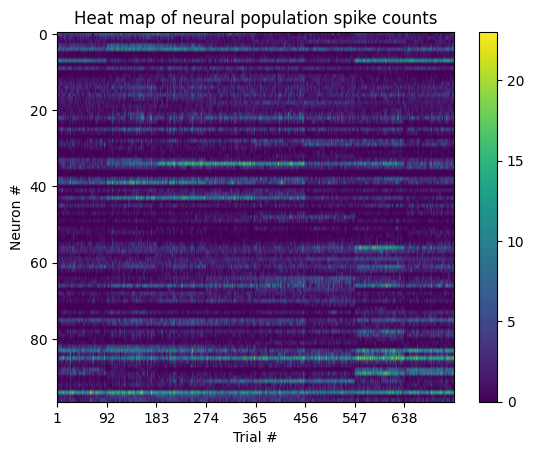

In [14]:
fig = plt.figure()
b   = plt.imshow(Xplan.T, aspect='auto')
fig.colorbar(b)
plt.xticks(range(0,n,91),range(1,n+1,91))
plt.ylabel('Neuron #')
plt.xlabel('Trial #')
plt.title('Heat map of neural population spike counts')

[EXERCISE 1a] Run PCA on the high-dimensional Xplan data. You can do this simply by diagonalizing the sample covariance matrix of the data $S = 1/N \sum_n (\boldsymbol{x}_n-\boldsymbol{\mu})(\boldsymbol{x}_n-\boldsymbol{\mu})^{\intercal} $, where $\boldsymbol{\mu}$ is the sample mean of the data, $\boldsymbol{\mu} = 1/N \sum_n \boldsymbol{x}_n$.

In [ ]:
# first find the mean of the data
mu = np.mean(Xplan,axis=0)

# now compute the data covariance
Xplan_centered = ... # don't forget to center your data first!
cov = ...            # now you can compute the covariance

# perform the eigendecomposition of the data covariance
D, U = ... # D = vector of eigenvalues, U = eigenvectors matrix

# make sure the eigenvalues are sorted (in descending order)
indx = np.argsort(D)[::-1]
D    = D[indx]

# arrange the eigenvectors according to the magnitude of the eigenvalues
U = U[:,indx]

In [ ]:
#@title Double click to see solution {display-mode: "form" }
# first find the mean of the data
mu = np.mean(Xplan,axis=0)
n  = Xplan.shape[0]
p  = Xplan.shape[1]

# now compute the data covariance
Xplan_centered = Xplan-mu                         # don't forget to center your data first!
cov = (1/n) * Xplan_centered.T @ Xplan_centered   # now you can compute the covariance

# perform eigendecomposition of the data covariance
D, U = np.linalg.eig(cov) # D = vector of eigenvalues, U = eigenvectors matrix

# make sure the eigenvalues are sorted (in descending order)
indx = np.argsort(D)[::-1]
D    = D[indx]

# arrange the eigenvectors according to the magnitude of the eigenvalues
U = U[:,indx]

Plot the square-rooted eigenvalue spectrum. If you had to identify an elbow in the eigenvalue spectrum, how many dominant eigenvalues would there be?

In [ ]:
#plot the square-root eigenvalue spectrum
fig = plt.figure()
plt.plot(np.sqrt(D),'-o',color='black')
plt.xlabel('dimensions')
plt.ylabel('square-rooted eigenvalues')
plt.title('Square-root eigenvalue spectrum')
plt.show()

Note that there is an elbow (a big drop) after the 3rd eigenvalue. This indicates that the first three dimensions capture most of the data variance.

[EXERCISE 1b] What percentage of the overall data variance is captured by the top 3 principal components?

In [ ]:
# Hint, this is a function of the eigenvectors D
percent_var = ....
print('percent variance explained = ', percent_var)

In [ ]:
#@title Double click to see solution {display-mode: "form" }
# Hint, this is a function of the eigenvectors D
percent_var = 100 * np.sum(D[0:3])/np.sum(D)
print('percent variance explained = ', percent_var)

For the purposes of visualization, consider the PC space defined by the 3 eigenvectors.

[EXERCISE 1c] Project the data points $\boldsymbol{x}_n \in \mathbb{R}^D$ into the three-dimensional PC space. The projections are the PC scores $\boldsymbol{z}_n \in \mathbb{R}^3$, where $z_n^i = \boldsymbol{u}_i^{\intercal} (\boldsymbol{x}_n - \boldsymbol{\mu})$, $i=1,2,3$. Plot the projected points, and color each dot appropriately according to reaching angle (there should be a total of 728 dots). Use your mouse to rotate the three-dimensional plot. Show a view in which the clusters are well-separated

In [ ]:
colors = ['r','k','y','g','b','m','c','darkviolet']
num_reaches_per_angle = 91;

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')

for reachAngle in range(8):
  indx = np.arange(0,num_reaches_per_angle,1)+(reachAngle)*num_reaches_per_angle
  X = Xplan_centered[indx,:]
  ax.scatter(X@U[:,0],X@U[:,1],X@U[:,2],'o', color=colors[reachAngle])

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.title('Reach data projected into three-dimensional PC space')


[EXERCISE 1d] Define a matrix $U_M$ containing the top 3 eigenvectors (i.e. the top 3 PCs), where $U(d,m)$ indicates the contribution of the dth neuron to the mth principal component. Show the values in $U$ as a heatmap. Are there are any obvious groupings among the neurons in each column of $U$?

In [ ]:
fig = plt.figure()
U3  = ...
b   = plt.imshow(U3, aspect='auto')
fig.colorbar(b)
plt.xticks([0,1,2],[1,2,3])
plt.xlabel('Principal component #')
plt.ylabel('Neuron #')
plt.title('Heat map of top three principal component directions')

In [ ]:
#@title Double click to see solution {display-mode: "form" }
fig = plt.figure()
U3  = U[:,0:3]
b   = plt.imshow(U3, aspect='auto')
fig.colorbar(b)
plt.xticks([0,1,2],[1,2,3])
plt.xlabel('Principal component #')
plt.ylabel('Neuron #')
plt.title('Heat map of top three principal component directions')

Most elements of the top three eigenvectors are relatively small, with absolute values less than 0.15, indicating that those neurons contibute relatively little to the corresponding principal component. The relatively large elements of a particular eigenvector, with absolute values greater than 0.15, indicate clusters of neurons working together along the direction defined by the eigenvector.

---
# About the author (feel free to contact)

## Joana Soldado Magraner
- Postdoctoral researcher at Carnegie Mellon University, Pittsburgh, US.
- I study the computational properties of prefrontal cortex circuits.
- I am also one of the organizer of this TReND-CaMinA course.
- Feel free to contact me: jsoldadomagraner@cmu.edu